In [3]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

### 01_층화분석

In [9]:
fish_multi = pd.read_csv('data1/3-6-1-fish_multi.csv')
fish_multi

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


In [10]:
# 표본 크기
len(fish_multi)

20

In [11]:
# 물고기 종류에 대한 도수분포
fish_multi['species'].value_counts()

species
A    10
B    10
Name: count, dtype: int64

In [12]:
# 물고기 몸 길이에 대한 평균
fish_multi['length'].mean()

5.5

### 그룹별 통계량 계산

In [18]:
# 물고기 몸길이에 대한 평균
# 방법1. 통계량을 구하기 위한 컬럼들과 그룹의 기준이 되는 컬럼들을 먼저 추출하여 통계량을 
# 계산한다.
# 그룹의 기준으로 정한 컬럼들을 제외하고 통계량을 구한다
a1 = fish_multi[['species', 'length']]
a2 = a1.groupby('species').mean()
a2

,length
species,
A,4.0
B,7.0


In [20]:
# 방법2. 일단 그룹으로 묶은 후 필요한 컬럼들을 가져와 통계량을 구한다.
a1 = fish_multi.groupby('species')['length'].mean()
a1

species
A    4.0
B    7.0
Name: length, dtype: float64

### 그룹별 요약 통계

In [22]:
# 요약 통계 정보
group = fish_multi.groupby('species')
group.describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [24]:
# 만약 pandas에 없는 통계량을 구하고자 한다면 다른 라이브러리의 통계량 구하는 함수를 사용할
# 수 있다.
group.agg(stats.mode)

,length
species,
A,"(4, 4)"
B,"(7, 4)"


### 펭귄 데이터 분석

In [74]:
# 데이터를 가져온다.
# seaborn에 내장된 팽귄의 데이터를 가져온다.
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [28]:
# 펭귄 종류 분포
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [30]:
# 섬 종류
penguins['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [32]:
# 각 섬별로 팽귄의 종류별 수를 확인한다.
a1 = penguins[['island', 'species', 'bill_length_mm']]
a2 = a1.groupby(['island', 'species']).size()
a2.columns = ['개체수']
a2

island     species  
Biscoe     Adelie        44
           Gentoo       124
Dream      Adelie        56
           Chinstrap     68
Torgersen  Adelie        52
dtype: int64

In [34]:
# 각 섬별로 팽귄의 수를 각각 구한다.
a1 = penguins.query('island == "Biscoe"')['species'].value_counts()
a2 = penguins.query('island == "Dream"')['species'].value_counts()
a3 = penguins.query('island == "Torgersen"')['species'].value_counts()

b1 = pd.DataFrame(a1)
b1.columns = ['Biscoe의 개체수']

b2 = pd.DataFrame(a2)
b2.columns = ['Dream의 개체수']

b3 = pd.DataFrame(a3)
b3.columns = ['Torgersen의 개체수']

display(b1)
display(b2)
display(b3)

,Biscoe의 개체수
species,
Gentoo,124
Adelie,44


,Dream의 개체수
species,
Chinstrap,68
Adelie,56


,Torgersen의 개체수
species,
Adelie,52


In [36]:
# 펭귄 종류 및 성별 집계
# 통계량을 구하기 위한 데이터들을 추출한다.
a1 = penguins[['species', 'sex', 'body_mass_g']]
a2 = a1.groupby(['species', 'sex']).count()
a2.columns = ['개체수']
a2

개체수
species   sex        
Adelie    Female   73
          Male     73
Chinstrap Female   34
          Male     34
Gentoo    Female   58
          Male     61

In [47]:
# 팽귄의 종류, 섬, 성별 개체수를 집계

In [38]:
# 팽귄의 종류, 섬, 성별 개체수를 집계
a1 = penguins[['species', 'island', 'sex', 'bill_length_mm']]
a2 = a1.groupby(['species', 'island', 'sex']).size()
a3 = pd.DataFrame(a2)
a3.columns = ['개체수']
a3

개체수
species   island    sex        
Adelie    Biscoe    Female   22
                    Male     22
          Dream     Female   27
                    Male     28
          Torgersen Female   24
                    Male     23
Chinstrap Dream     Female   34
                    Male     34
Gentoo    Biscoe    Female   58
                    Male     61

### 결측치 처리

In [40]:
# 컬럼별 결측치 확인
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [42]:
# 제거
# 결측치를 가지고 있는 모든 행을 삭제한다.
penguins2 = penguins.copy()

penguins2.dropna(inplace=True)

penguins2.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [44]:
# 제거
# 결측치를 가지고 있는 모든 행을 삭제한다.
penguins2 = penguins.copy()

penguins2.dropna(inplace=True)

penguins2.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [46]:
# 결측치가 많이 있다고 생각되는 컬럼이 있다면 컬럼을 제거하는 것이 좋다.
penguins2 = penguins.copy()
# 성별 컬럼에 결측치가 굉장히 많이 있다고 가정한다.
# sex 컬럼 제거
penguins2.drop(['sex'], axis=1, inplace=True)
penguins2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0


In [48]:
# 각 컬럼의 평균을 구해서 담아준다.
# numeric_only에 True를 넣어주면 숫자가 저장되어 있는 컬럼만을 가지고 통계량 값을 구해준다.
# 이렇게 계산된 평균 중에 범주형 데이터 컬럼을 제외한 나머지만 확인한다.
a1 = penguins.mean(numeric_only=True)
a1

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

In [50]:
# 각 컬럼의 결측치를 모두 같은 값으로 채워주고 싶다면..
penguins2 = penguins.copy()

idx1 = penguins2.query('bill_length_mm.isna()').index
idx2 = penguins2.query('bill_depth_mm.isna()').index
idx3 = penguins2.query('flipper_length_mm.isna()').index
idx4 = penguins2.query('body_mass_g.isna()').index

display(penguins2.loc[idx1])
display(penguins2.loc[idx2])
display(penguins2.loc[idx3])
display(penguins2.loc[idx4])

penguins2.fillna(10, inplace=True)

display(penguins2.loc[idx1])
display(penguins2.loc[idx2])
display(penguins2.loc[idx3])
display(penguins2.loc[idx4])

# 데이터 프레임의 모든 결측치를 하나의 값으로 다 채워주는 것은 컬럼이 가질 수 있는 정상 데이터가
# 아닌 것이 포함될 수 있기 때문에 하지마세요!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,10.0,10.0,10.0,10.0,10
339,Gentoo,Biscoe,10.0,10.0,10.0,10.0,10


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,10.0,10.0,10.0,10.0,10
339,Gentoo,Biscoe,10.0,10.0,10.0,10.0,10


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,10.0,10.0,10.0,10.0,10
339,Gentoo,Biscoe,10.0,10.0,10.0,10.0,10


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,10.0,10.0,10.0,10.0,10
339,Gentoo,Biscoe,10.0,10.0,10.0,10.0,10


In [85]:
# 데이터 프레임에서 컬럼명으로 추출하여 fillna를 사용하는 것은 더이상 권장하지 않는다.
# loc나 iloc를 통해 데이터 프레임에 직접 접근하여 값을 넣어주는 것을 권장한다.
# 각 컬럼별 평균값을 결측치로 채워준다.
penguins2 = penguins.copy()

idx1 = penguins2.query('bill_length_mm.isna()').index
idx2 = penguins2.query('bill_depth_mm.isna()').index
idx3 = penguins2.query('flipper_length_mm.isna()').index
idx4 = penguins2.query('body_mass_g.isna()').index

display(penguins2.loc[idx1])
display(penguins2.loc[idx2])
display(penguins2.loc[idx3])
display(penguins2.loc[idx4])

penguins2.loc[idx1, 'bill_length_mm'] = a1['bill_length_mm']
penguins2.loc[idx2, 'bill_depth_mm'] = a1['bill_depth_mm']
penguins2.loc[idx3, 'flipper_length_mm'] = a1['flipper_length_mm']
penguins2.loc[idx4, 'body_mass_g'] = a1['body_mass_g']

display(penguins2.loc[idx1])
display(penguins2.loc[idx2])
display(penguins2.loc[idx3])
display(penguins2.loc[idx4])

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,NaN


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,NaN


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,NaN


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,NaN


In [52]:
# 각 컬럼별 평균값을 결측치로 채워준다.
penguins2 = penguins.copy()

idx1 = penguins2.query('bill_length_mm.isna()').index
idx2 = penguins2.query('bill_depth_mm.isna()').index
idx3 = penguins2.query('flipper_length_mm.isna()').index
idx4 = penguins2.query('body_mass_g.isna()').index

display(penguins2.loc[idx1])
display(penguins2.loc[idx2])
display(penguins2.loc[idx3])
display(penguins2.loc[idx4])

penguins2['bill_length_mm'].fillna(a1['bill_length_mm'], inplace=True)
penguins2['bill_depth_mm'].fillna(a1['bill_depth_mm'], inplace=True)
penguins2['flipper_length_mm'].fillna(a1['flipper_length_mm'], inplace=True)
penguins2['body_mass_g'].fillna(a1['body_mass_g'], inplace=True)

display(penguins2.loc[idx1])
display(penguins2.loc[idx2])
display(penguins2.loc[idx3])
display(penguins2.loc[idx4])

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17952\1154675671.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguins2['bill_length_mm'].fillna(a1['bill_length_mm'], inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17952\1154675671.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,NaN


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,NaN


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,NaN


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,NaN


In [54]:
# 범주형 데이터는 대표값으로 사용할만한 것이 최빈값 밖에는 없다.
# 도수를 이용하여 최빈값 가져오기
a1 = penguins['sex'].value_counts()
# value_counts는 구한 도수를 기준으로 내림차순 정렬해서 가져오기 때문에
# 이에, 가장 처음에 있는 것이 최빈값이 된다.
a2 = a1.index[0]
print(a2)

# 요약 통계 정보를 통한 최빈값 가져오기
# 문자열 타입의 Series를 통한 요약 통계 정보를 가져오면 범주형 데이터에 대한
# 요약통계 정보를 파악할 수 있다. 여기에서 top이 최빈값이 된다.
a1 = penguins['sex'].astype('str').describe()
a2 = a1['top']
print(a2)

Male
Male


In [56]:
# 구한 최빈값으로 채워준다.
idx1 = penguins2.query('sex.isna()').index

display(penguins2.loc[idx1])

penguins2.loc[idx1, 'sex'] = a2

display(penguins2.loc[idx1])

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
8,Adelie,Torgersen,34.10000,18.10000,193.000000,3475.000000,NaN
9,Adelie,Torgersen,42.00000,20.20000,190.000000,4250.000000,NaN
10,Adelie,Torgersen,37.80000,17.10000,186.000000,3300.000000,NaN
11,Adelie,Torgersen,37.80000,17.30000,180.000000,3700.000000,NaN
47,Adelie,Dream,37.50000,18.90000,179.000000,2975.000000,NaN
246,Gentoo,Biscoe,44.50000,14.30000,216.000000,4100.000000,NaN
286,Gentoo,Biscoe,46.20000,14.40000,214.000000,4650.000000,NaN
324,Gentoo,Biscoe,47.30000,13.80000,216.000000,4725.000000,NaN
336,Gentoo,Biscoe,44.50000,15.70000,217.000000,4875.000000,NaN


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
8,Adelie,Torgersen,34.10000,18.10000,193.000000,3475.000000,Male
9,Adelie,Torgersen,42.00000,20.20000,190.000000,4250.000000,Male
10,Adelie,Torgersen,37.80000,17.10000,186.000000,3300.000000,Male
11,Adelie,Torgersen,37.80000,17.30000,180.000000,3700.000000,Male
47,Adelie,Dream,37.50000,18.90000,179.000000,2975.000000,Male
246,Gentoo,Biscoe,44.50000,14.30000,216.000000,4100.000000,Male
286,Gentoo,Biscoe,46.20000,14.40000,214.000000,4650.000000,Male
324,Gentoo,Biscoe,47.30000,13.80000,216.000000,4725.000000,Male
336,Gentoo,Biscoe,44.50000,15.70000,217.000000,4875.000000,Male


In [58]:
# 좀더 세밀하게 값을 구해서 채워주고 싶다면 층화분석을 활용한다.
# 성별에 채울 대표값을 종류와 섬을 기준으로 그룹을 나눈 후 각각에 대한 최빈값을 구해 담아준다.
penguins2 = penguins.copy()

# 최빈값을 구하고자 하는 컬럼들을 추출한다.
a1 = penguins2[['species', 'island', 'sex']]
a2 = a1.groupby(['species', 'island']).describe()
a2

sex                    
                    count unique     top freq
species   island                             
Adelie    Biscoe       44      2  Female   22
          Dream        55      2    Male   28
          Torgersen    47      2  Female   24
Chinstrap Dream        68      2  Female   34
Gentoo    Biscoe      119      2    Male   61

In [60]:
idx1 = penguins2.query('species == "Adelie" and island == "Biscoe" and sex.isna()').index
penguins2.loc[idx1, 'sex'] = a2.loc['Adelie'].loc['Biscoe'].loc['sex'].loc['top']

idx1 = penguins2.query('species == "Adelie" and island == "Dream" and sex.isna()').index
penguins2.loc[idx1, 'sex'] = a2.loc['Adelie'].loc['Dream'].loc['sex'].loc['top']

idx1 = penguins2.query('species == "Adelie" and island == "Torgersen" and sex.isna()').index
penguins2.loc[idx1, 'sex'] = a2.loc['Adelie'].loc['Torgersen'].loc['sex'].loc['top']

idx1 = penguins2.query('species == "Chinstrap" and island == "Dream" and sex.isna()').index
penguins2.loc[idx1, 'sex'] = a2.loc['Chinstrap'].loc['Dream'].loc['sex'].loc['top']

idx1 = penguins2.query('species == "Gentoo" and island == "Biscoe" and sex.isna()').index
penguins2.loc[idx1, 'sex'] = a2.loc['Gentoo'].loc['Biscoe'].loc['sex'].loc['top']

display(penguins2['sex'].isna().sum())
display(penguins2['sex'].value_counts())

0

sex
Male      174
Female    170
Name: count, dtype: int64

In [78]:
a1 = penguins2.groupby(['species', 'island', 'sex']).mean()
a1

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   island    sex                                                        
Adelie    Biscoe    Female       37.359091      17.704545         187.181818   
                    Male         40.590909      19.036364         190.409091   
          Dream     Female       36.911111      17.618519         187.851852   
                    Male         39.982759      18.841379         191.482759   
          Torgersen Female       37.607143      17.639286         188.142857   
                    Male         40.586957      19.391304         194.913043   
Chinstrap Dream     Female       46.573529      17.588235         191.735294   
                    Male         51.094118      19.252941         199.911765   
Gentoo    Biscoe    Female       45.563793      14.237931         212.706897   
                    Male         49.236923      15.646154         221.184615   

                            body_mass_g  
species   island    sex                  
Adelie    Biscoe    Female  3369.318182  
                    Male    4050.000000  
          Dream     Female  3344.444444  
                    Male    4008.620690  
          Torgersen Female  3436.607143  
                    Male    4034.782609  
Chinstrap Dream     Female  3527.205882  
                    Male    3938.970588  
Gentoo    Biscoe    Female  4679.741379  
                    Male    5429.615385

In [84]:
# 결측치를 채워준다.
idx1 = penguins2.query('species == "Adelie" and island == "Biscoe" and sex == "Female" and bill_length_mm.isna()').index
penguins2.loc[idx1, 'bill_length_mm'] = a1.loc['Adelie'].loc['Biscoe'].loc['Female']['bill_length_mm']

idx1 = penguins2.query('species == "Adelie" and island == "Biscoe" and sex == "Male" and bill_length_mm.isna()').index
penguins2.loc[idx1, 'bill_length_mm'] = a1.loc['Adelie'].loc['Biscoe'].loc['Male']['bill_length_mm']

idx1 = penguins2.query('species == "Adelie" and island == "Dream" and sex == "Female" and bill_length_mm.isna()').index
penguins2.loc[idx1, 'bill_length_mm'] = a1.loc['Adelie'].loc['Dream'].loc['Female']['bill_length_mm']

idx1 = penguins2.query('species == "Adelie" and island == "Dream" and sex == "Male" and bill_length_mm.isna()').index
penguins2.loc[idx1, 'bill_length_mm'] = a1.loc['Adelie'].loc['Dream'].loc['Male']['bill_length_mm']

idx1 = penguins2.query('species == "Adelie" and island == "Torgersen" and sex == "Female" and bill_length_mm.isna()').index
penguins2.loc[idx1, 'bill_length_mm'] = a1.loc['Adelie'].loc['Torgersen'].loc['Female']['bill_length_mm']

idx1 = penguins2.query('species == "Adelie" and island == "Torgersen" and sex == "Male" and bill_length_mm.isna()').index
penguins2.loc[idx1, 'bill_length_mm'] = a1.loc['Adelie'].loc['Torgersen'].loc['Male']['bill_length_mm']

idx1 = penguins2.query('species == "Chinstrap" and island == "Dream" and sex == "Female" and bill_length_mm.isna()').index
penguins2.loc[idx1, 'bill_length_mm'] = a1.loc['Chinstrap'].loc['Dream'].loc['Female']['bill_length_mm']

idx1 = penguins2.query('species == "Chinstrap" and island == "Dream" and sex == "Male" and bill_length_mm.isna()').index
penguins2.loc[idx1, 'bill_length_mm'] = a1.loc['Chinstrap'].loc['Dream'].loc['Male']['bill_length_mm']

idx1 = penguins2.query('species == "Gentoo" and island == "Biscoe" and sex == "Female" and bill_length_mm.isna()').index
penguins2.loc[idx1, 'bill_length_mm'] = a1.loc['Gentoo'].loc['Biscoe'].loc['Female']['bill_length_mm']

idx1 = penguins2.query('species == "Gentoo" and island == "Biscoe" and sex == "Male" and bill_length_mm.isna()').index
penguins2.loc[idx1, 'bill_length_mm'] = a1.loc['Gentoo'].loc['Biscoe'].loc['Male']['bill_length_mm']

In [86]:
# 결측치를 채워준다.
idx1 = penguins2.query('species == "Adelie" and island == "Biscoe" and sex == "Female" and bill_depth_mm.isna()').index
penguins2.loc[idx1, 'bill_depth_mm'] = a1.loc['Adelie'].loc['Biscoe'].loc['Female']['bill_depth_mm']

idx1 = penguins2.query('species == "Adelie" and island == "Biscoe" and sex == "Male" and bill_depth_mm.isna()').index
penguins2.loc[idx1, 'bill_depth_mm'] = a1.loc['Adelie'].loc['Biscoe'].loc['Male']['bill_depth_mm']

idx1 = penguins2.query('species == "Adelie" and island == "Dream" and sex == "Female" and bill_depth_mm.isna()').index
penguins2.loc[idx1, 'bill_depth_mm'] = a1.loc['Adelie'].loc['Dream'].loc['Female']['bill_depth_mm']

idx1 = penguins2.query('species == "Adelie" and island == "Dream" and sex == "Male" and bill_depth_mm.isna()').index
penguins2.loc[idx1, 'bill_depth_mm'] = a1.loc['Adelie'].loc['Dream'].loc['Male']['bill_depth_mm']

idx1 = penguins2.query('species == "Adelie" and island == "Torgersen" and sex == "Female" and bill_depth_mm.isna()').index
penguins2.loc[idx1, 'bill_depth_mm'] = a1.loc['Adelie'].loc['Torgersen'].loc['Female']['bill_depth_mm']

idx1 = penguins2.query('species == "Adelie" and island == "Torgersen" and sex == "Male" and bill_depth_mm.isna()').index
penguins2.loc[idx1, 'bill_depth_mm'] = a1.loc['Adelie'].loc['Torgersen'].loc['Male']['bill_depth_mm']

idx1 = penguins2.query('species == "Chinstrap" and island == "Dream" and sex == "Female" and bill_depth_mm.isna()').index
penguins2.loc[idx1, 'bill_depth_mm'] = a1.loc['Chinstrap'].loc['Dream'].loc['Female']['bill_depth_mm']

idx1 = penguins2.query('species == "Chinstrap" and island == "Dream" and sex == "Male" and bill_depth_mm.isna()').index
penguins2.loc[idx1, 'bill_depth_mm'] = a1.loc['Chinstrap'].loc['Dream'].loc['Male']['bill_depth_mm']

idx1 = penguins2.query('species == "Gentoo" and island == "Biscoe" and sex == "Female" and bill_depth_mm.isna()').index
penguins2.loc[idx1, 'bill_depth_mm'] = a1.loc['Gentoo'].loc['Biscoe'].loc['Female']['bill_depth_mm']

idx1 = penguins2.query('species == "Gentoo" and island == "Biscoe" and sex == "Male" and bill_depth_mm.isna()').index
penguins2.loc[idx1, 'bill_depth_mm'] = a1.loc['Gentoo'].loc['Biscoe'].loc['Male']['bill_depth_mm']

In [88]:
# 결측치를 채워준다.
idx1 = penguins2.query('species == "Adelie" and island == "Biscoe" and sex == "Female" and flipper_length_mm.isna()').index
penguins2.loc[idx1, 'flipper_length_mm'] = a1.loc['Adelie'].loc['Biscoe'].loc['Female']['flipper_length_mm']

idx1 = penguins2.query('species == "Adelie" and island == "Biscoe" and sex == "Male" and flipper_length_mm.isna()').index
penguins2.loc[idx1, 'flipper_length_mm'] = a1.loc['Adelie'].loc['Biscoe'].loc['Male']['flipper_length_mm']

idx1 = penguins2.query('species == "Adelie" and island == "Dream" and sex == "Female" and flipper_length_mm.isna()').index
penguins2.loc[idx1, 'flipper_length_mm'] = a1.loc['Adelie'].loc['Dream'].loc['Female']['flipper_length_mm']

idx1 = penguins2.query('species == "Adelie" and island == "Dream" and sex == "Male" and flipper_length_mm.isna()').index
penguins2.loc[idx1, 'flipper_length_mm'] = a1.loc['Adelie'].loc['Dream'].loc['Male']['flipper_length_mm']

idx1 = penguins2.query('species == "Adelie" and island == "Torgersen" and sex == "Female" and flipper_length_mm.isna()').index
penguins2.loc[idx1, 'flipper_length_mm'] = a1.loc['Adelie'].loc['Torgersen'].loc['Female']['flipper_length_mm']

idx1 = penguins2.query('species == "Adelie" and island == "Torgersen" and sex == "Male" and flipper_length_mm.isna()').index
penguins2.loc[idx1, 'flipper_length_mm'] = a1.loc['Adelie'].loc['Torgersen'].loc['Male']['flipper_length_mm']

idx1 = penguins2.query('species == "Chinstrap" and island == "Dream" and sex == "Female" and flipper_length_mm.isna()').index
penguins2.loc[idx1, 'flipper_length_mm'] = a1.loc['Chinstrap'].loc['Dream'].loc['Female']['flipper_length_mm']

idx1 = penguins2.query('species == "Chinstrap" and island == "Dream" and sex == "Male" and flipper_length_mm.isna()').index
penguins2.loc[idx1, 'flipper_length_mm'] = a1.loc['Chinstrap'].loc['Dream'].loc['Male']['flipper_length_mm']

idx1 = penguins2.query('species == "Gentoo" and island == "Biscoe" and sex == "Female" and flipper_length_mm.isna()').index
penguins2.loc[idx1, 'flipper_length_mm'] = a1.loc['Gentoo'].loc['Biscoe'].loc['Female']['flipper_length_mm']

idx1 = penguins2.query('species == "Gentoo" and island == "Biscoe" and sex == "Male" and flipper_length_mm.isna()').index
penguins2.loc[idx1, 'flipper_length_mm'] = a1.loc['Gentoo'].loc['Biscoe'].loc['Male']['flipper_length_mm']

In [90]:
# 결측치를 채워준다.
idx1 = penguins2.query('species == "Adelie" and island == "Biscoe" and sex == "Female" and body_mass_g.isna()').index
penguins2.loc[idx1, 'body_mass_g'] = a1.loc['Adelie'].loc['Biscoe'].loc['Female']['body_mass_g']

idx1 = penguins2.query('species == "Adelie" and island == "Biscoe" and sex == "Male" and body_mass_g.isna()').index
penguins2.loc[idx1, 'body_mass_g'] = a1.loc['Adelie'].loc['Biscoe'].loc['Male']['body_mass_g']

idx1 = penguins2.query('species == "Adelie" and island == "Dream" and sex == "Female" and body_mass_g.isna()').index
penguins2.loc[idx1, 'body_mass_g'] = a1.loc['Adelie'].loc['Dream'].loc['Female']['body_mass_g']

idx1 = penguins2.query('species == "Adelie" and island == "Dream" and sex == "Male" and body_mass_g.isna()').index
penguins2.loc[idx1, 'body_mass_g'] = a1.loc['Adelie'].loc['Dream'].loc['Male']['body_mass_g']

idx1 = penguins2.query('species == "Adelie" and island == "Torgersen" and sex == "Female" and body_mass_g.isna()').index
penguins2.loc[idx1, 'body_mass_g'] = a1.loc['Adelie'].loc['Torgersen'].loc['Female']['body_mass_g']

idx1 = penguins2.query('species == "Adelie" and island == "Torgersen" and sex == "Male" and body_mass_g.isna()').index
penguins2.loc[idx1, 'body_mass_g'] = a1.loc['Adelie'].loc['Torgersen'].loc['Male']['body_mass_g']

idx1 = penguins2.query('species == "Chinstrap" and island == "Dream" and sex == "Female" and body_mass_g.isna()').index
penguins2.loc[idx1, 'body_mass_g'] = a1.loc['Chinstrap'].loc['Dream'].loc['Female']['body_mass_g']

idx1 = penguins2.query('species == "Chinstrap" and island == "Dream" and sex == "Male" and body_mass_g.isna()').index
penguins2.loc[idx1, 'body_mass_g'] = a1.loc['Chinstrap'].loc['Dream'].loc['Male']['body_mass_g']

idx1 = penguins2.query('species == "Gentoo" and island == "Biscoe" and sex == "Female" and body_mass_g.isna()').index
penguins2.loc[idx1, 'body_mass_g'] = a1.loc['Gentoo'].loc['Biscoe'].loc['Female']['body_mass_g']

idx1 = penguins2.query('species == "Gentoo" and island == "Biscoe" and sex == "Male" and body_mass_g.isna()').index
penguins2.loc[idx1, 'body_mass_g'] = a1.loc['Gentoo'].loc['Biscoe'].loc['Male']['body_mass_g']

In [92]:
penguins2.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### 그룹 시각화

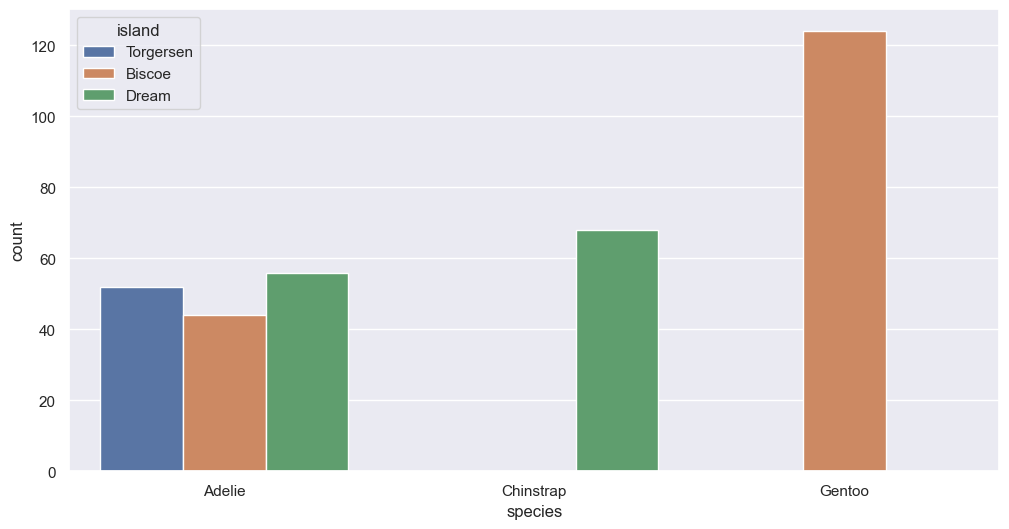

In [95]:
sns.countplot(data=penguins2, x='species', hue='island')
plt.show()

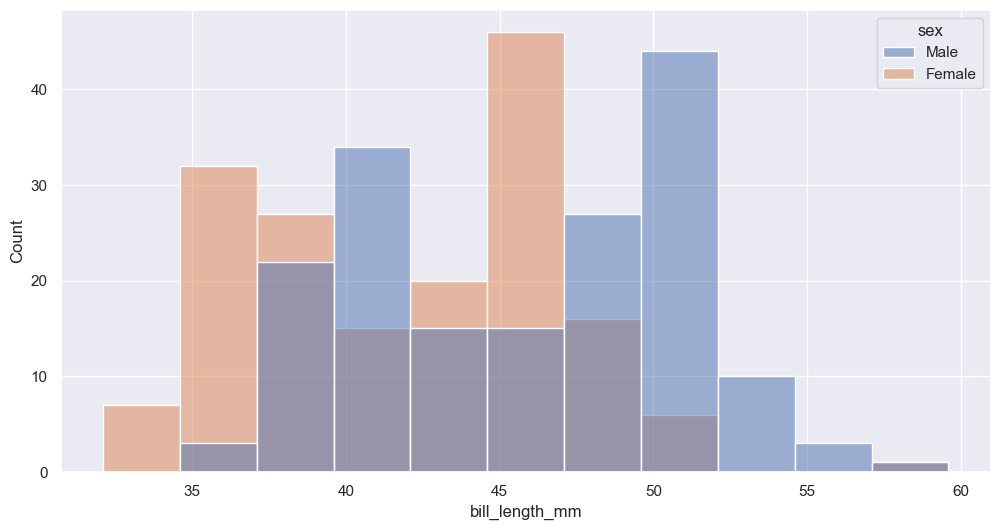

In [99]:
sns.histplot(data=penguins2, x='bill_length_mm', hue='sex')
plt.show()

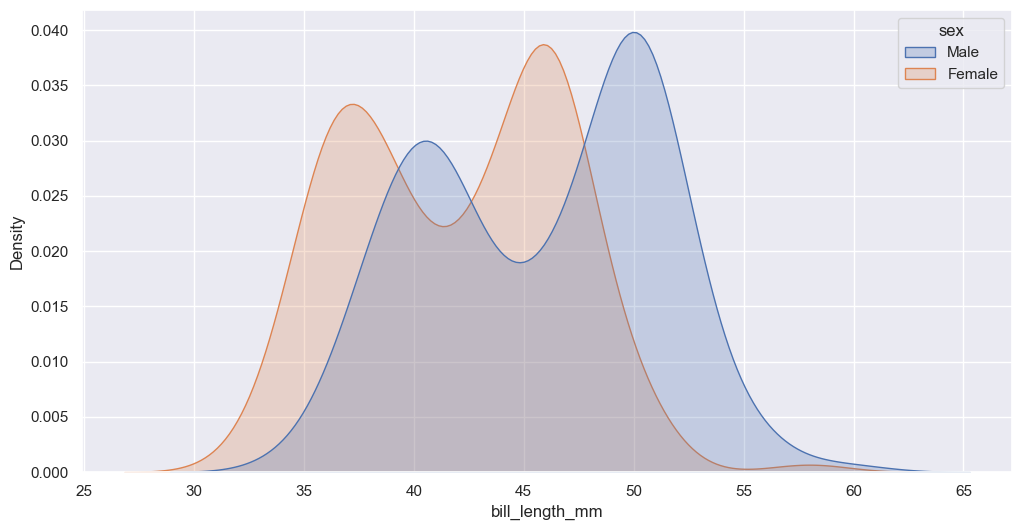

In [101]:
sns.kdeplot(data=penguins2, x='bill_length_mm', hue='sex', fill=True)
plt.show()

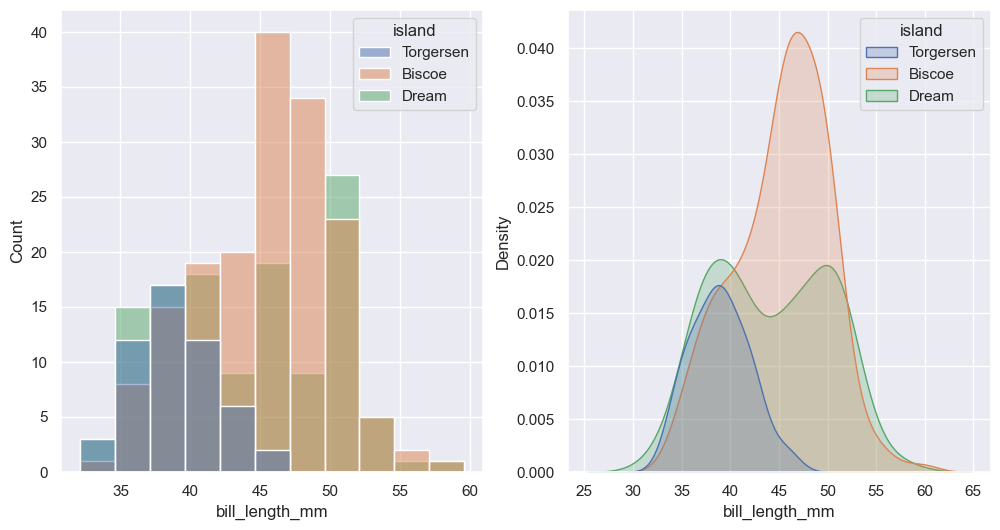

In [105]:
plt.subplot(1, 2, 1)
sns.histplot(data=penguins2, x='bill_length_mm', hue='island')

plt.subplot(1, 2, 2)
sns.kdeplot(data=penguins2, x='bill_length_mm', hue='island', fill=True)

plt.show()